# Session 3 - More image processing with ```OpenCV```

In [1]:
import os
# adding python path
import sys
sys.path.append("..")
# openCV
import cv2
# numpy
import numpy as np
# class util functions
from utils.imutils import jimshow as show
from utils.imutils import jimshow_channel as show_channel
# plotting 
import matplotlib.pyplot as plt

In [2]:
filepath = os.path.join("..","..","..", "cds-vis-data", "data", "img", "terasse.jpeg")

In [65]:
image = cv2.imread(filepath)

In [5]:
image.shape

(1576, 1200, 3)

## Greyscale Histogram

In [7]:
# converting to greyscale
greyed_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [29]:
# cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
histB = cv2.calcHist([image], [0], None, [255], [0,256])
histG = cv2.calcHist([image], [1], None, [255], [0,256])
histR = cv2.calcHist([image], [2], None, [255], [0,256])

In [22]:
hist.shape

(255, 1)

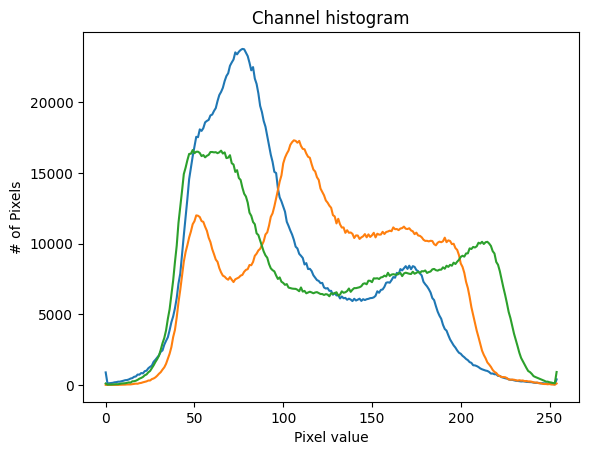

In [30]:
# plotting with matplotlib
# creating figure
plt.figure()
# add histogram
plt.plot(histB)
plt.plot(histG)
plt.plot(histR)
# plot title
plt.title("Channel histogram")
plt.xlabel("Pixel value")
plt.ylabel("# of Pixels")
plt.show()

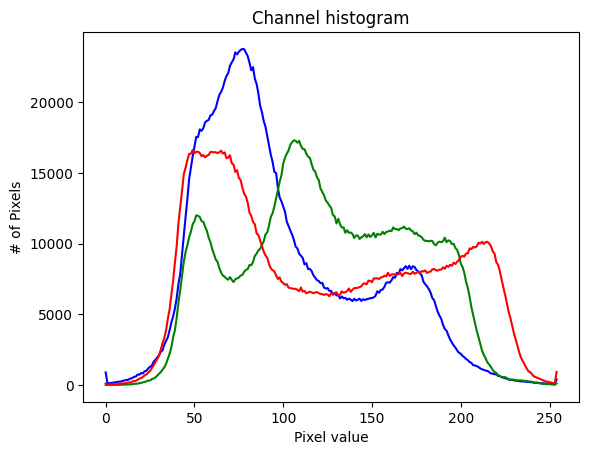

In [32]:
colors = ('b', 'g', 'r')
for i, color in enumerate(colors):
    hist = cv2.calcHist([image], [i], None, [255], [0,256])
    plt.plot(hist, color = color)
plt.title("Channel histogram")
plt.xlabel("Pixel value")
plt.ylabel("# of Pixels")
plt.show()

In [34]:
# using cv2.split()
BLUE, GREEN, RED = cv2.split(image)

In [35]:
BLUE

array([[239, 238, 224, ...,  99,  95, 100],
       [244, 240, 149, ..., 110,  96,  80],
       [228, 237, 152, ..., 106,  98,  83],
       ...,
       [206, 168, 173, ..., 142, 137, 147],
       [214, 182, 178, ..., 103, 123, 144],
       [205, 147, 168, ..., 186, 194, 186]], dtype=uint8)

In [37]:
histB = cv2.calcHist([BLUE], [0], None, [255], [0,256])

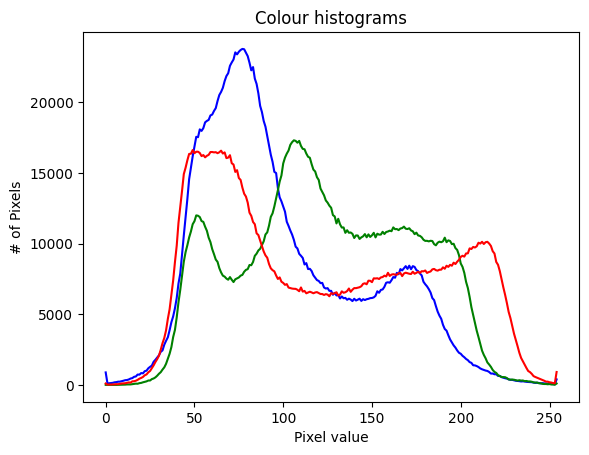

In [45]:
# create tuples
channels = cv2.split(image)
# create color tuple
colors = ("blue", "green", "red")
# create plot
plt.figure()
plt.title("Colour histograms")
plt.xlabel("Pixel value")
plt.ylabel("# of Pixels")

count = 0

for channel in channels:
    hist = cv2.calcHist([channel], [0], None, [255], [0,256])
    plt.plot(hist, color = colors[count])
    count = count + 1

plt.show()



## Comparing Histograms

In [54]:
filepath_1 = os.path.join("..","..","..", "cds-vis-data", "data", "img", "trex.png")
filepath_2 = os.path.join("..","..","..", "cds-vis-data", "data", "img", "t-rex2.png")

In [55]:
image_1 = cv2.imread(filepath_1)
image_2 = cv2.imread(filepath_2)

In [58]:
hist_1 = cv2.calcHist([image_1], [0, 1, 2], None, [255, 255, 255], [0,256, 0,256, 0,256])
hist_2 = cv2.calcHist([image_2], [0, 1, 2], None, [255, 255, 255], [0,256, 0,256, 0,256])

In [59]:
normalized_hist_1 = cv2.normalize(hist_1, hist_1, 0, 1.0, cv2.NORM_MINMAX)
normalized_hist_2 = cv2.normalize(hist_2, hist_2, 0, 1.0, cv2.NORM_MINMAX)

In [63]:
round(cv2.compareHist(normalized_hist_1, normalized_hist_2, cv2.HISTCMP_CHISQR), 2)

33.76

In [ ]:
# save output
outpath = os.path.join("..", "output", "histogram.png")
# save image to path
cv2.imwrite(outpath, image)

In [73]:
filepath = os.path.join("..","..","..", "cds-vis-data", "data", "img")
imgs = os.listdir(filepath)
imgs


['trex.png',
 'the_bedroom.jpg',
 'wave.png',
 'index.jpg',
 'florence.jpg',
 't-rex2.png',
 'jefferson.jpg',
 'starry_night.jpg',
 'clonazepam_1mg.png',
 'beach.png',
 'coins.png',
 'terasse.jpeg']

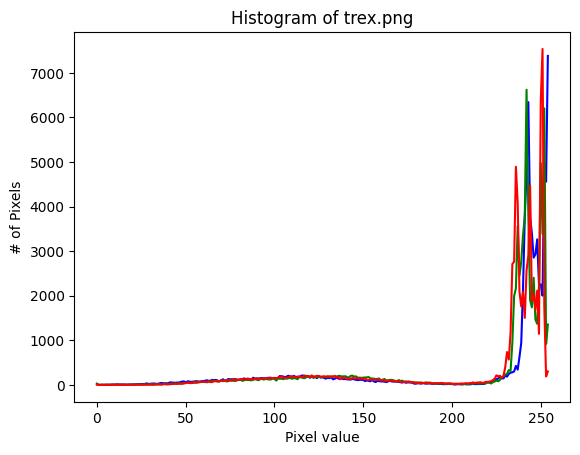

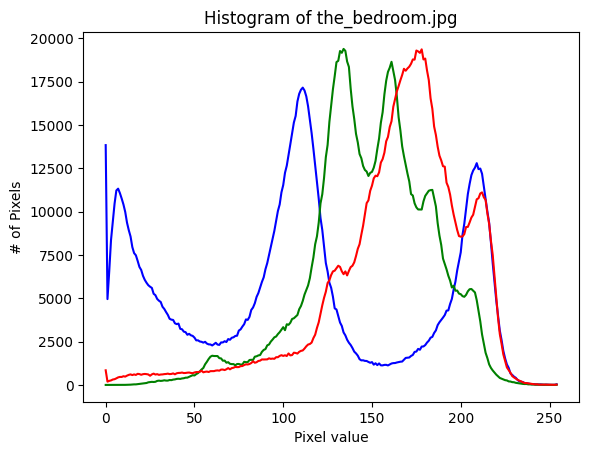

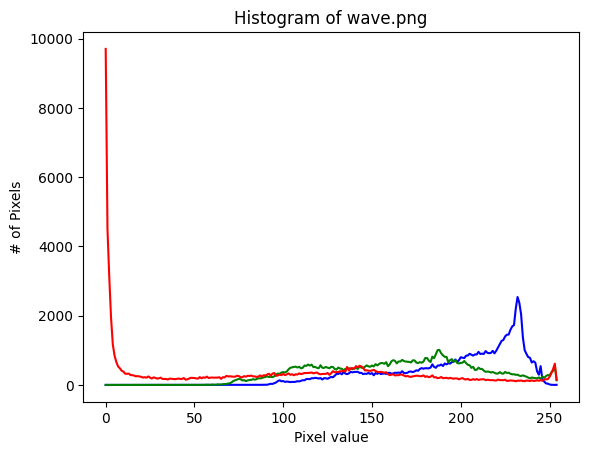

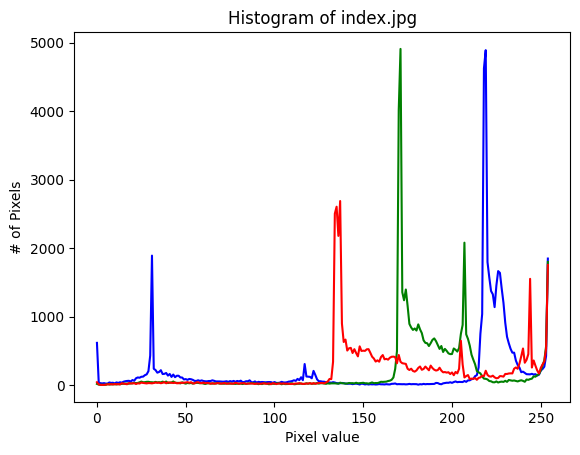

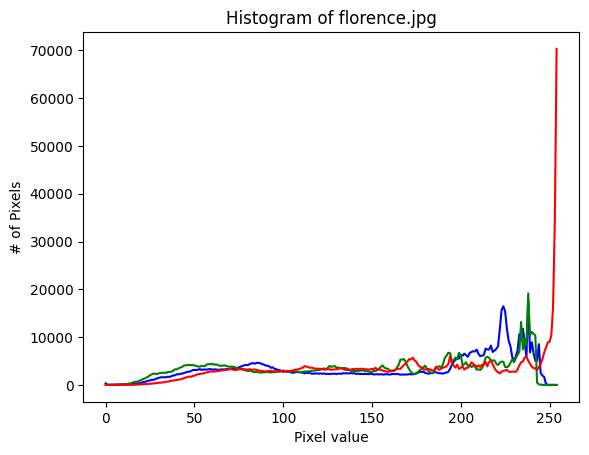

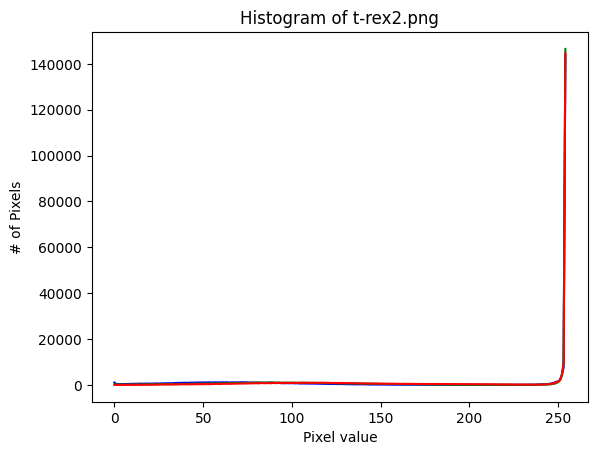

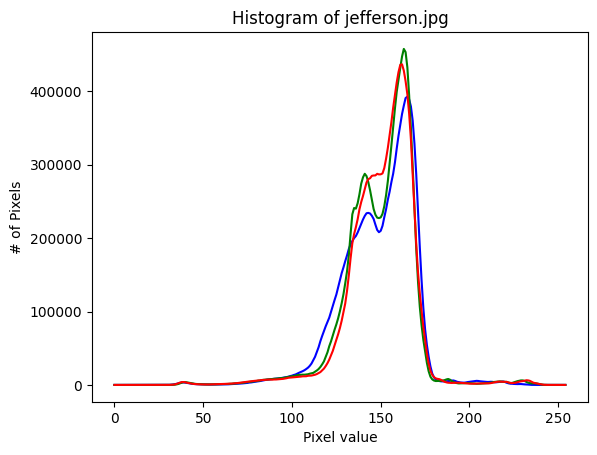

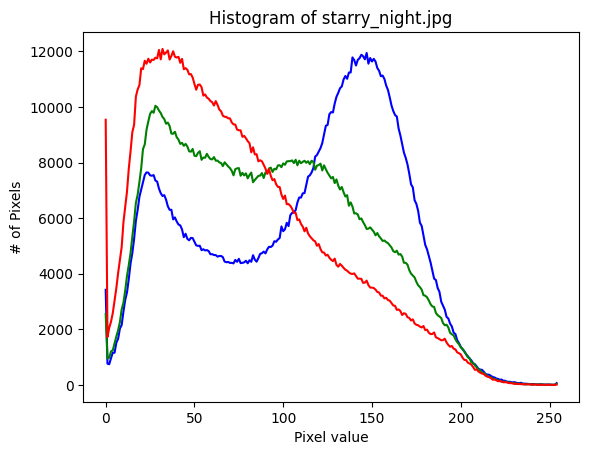

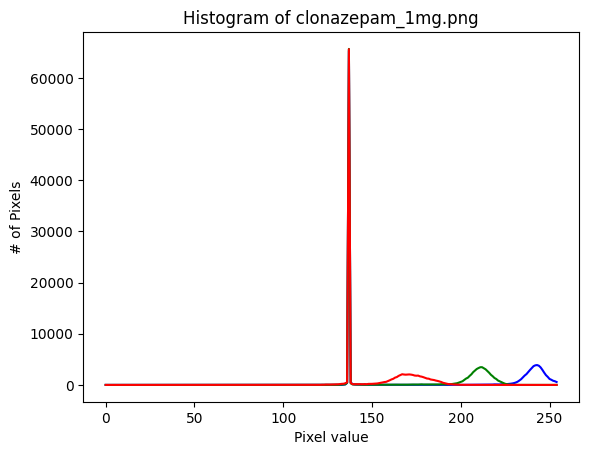

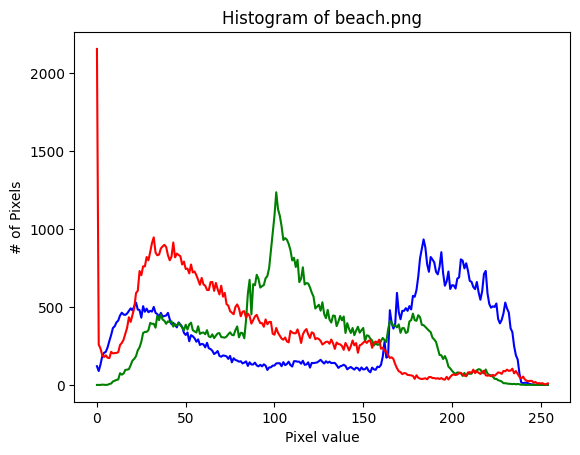

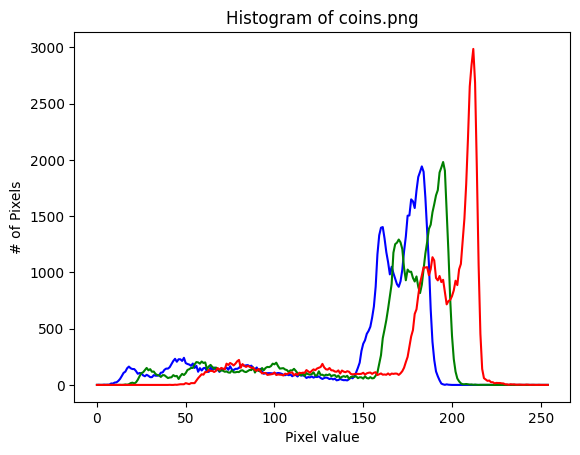

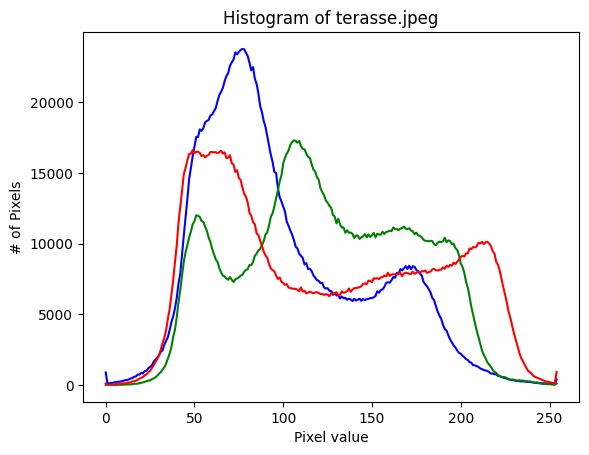

In [79]:
for img in imgs:
    imgpath = os.path.join(filepath, img)
    image = cv2.imread(imgpath)
    # create tuples
    channels = cv2.split(image)
    # create color tuple
    colors = ("blue", "green", "red")
    # create plot
    plt.figure()
    plt.title("Histogram of " + img)
    plt.xlabel("Pixel value")
    plt.ylabel("# of Pixels")

    count = 0

    for channel in channels:
        hist = cv2.calcHist([channel], [0], None, [255], [0,256])
        plt.plot(hist, color = colors[count])
        count = count + 1

    #saving image
    outpath = os.path.join("..", "output", "BGRHistogramOf_" + img)
    plt.savefig(outpath)
